In [89]:
import numpy as np # linear algebra
import pandas as pd
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,median_absolute_error
import matplotlib.pyplot as plt
calendar = pd.read_csv('calendar.csv').drop(['minimum_nights','maximum_nights'],axis=1)
calendar.head()

,listing_id,date,available,price,adjusted_price
0,69074,2019-09-20,f,"$1,104.00","$1,104.00"
1,69074,2019-09-21,f,"$1,104.00","$1,104.00"
2,69074,2019-09-22,f,"$1,065.00","$1,065.00"
3,69074,2019-09-23,f,"$1,073.00","$1,073.00"
4,69074,2019-09-24,f,"$1,300.00","$1,300.00"


In [90]:
#check for null values
calendar.isnull().mean()

listing_id        0.000000
date              0.000000
available         0.000000
price             0.000037
adjusted_price    0.000037
dtype: float64

In [91]:
calendar.dtypes

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
dtype: object

In [92]:
calendar['available'] = calendar['available'].map({'t': True, 'f': False})
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = pd.to_numeric(calendar['price'].str.replace('$','').str.replace(',',''));
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'].str.replace('$','').str.replace(',',''));
calendar['delta_price'] = calendar['adjusted_price'] - calendar['price']

In [93]:
calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                   bool
price                    float64
adjusted_price           float64
delta_price              float64
dtype: object

In [94]:
calendar.head()

,listing_id,date,available,price,adjusted_price,delta_price
0,69074,2019-09-20,False,1104.0,1104.0,0.0
1,69074,2019-09-21,False,1104.0,1104.0,0.0
2,69074,2019-09-22,False,1065.0,1065.0,0.0
3,69074,2019-09-23,False,1073.0,1073.0,0.0
4,69074,2019-09-24,False,1300.0,1300.0,0.0


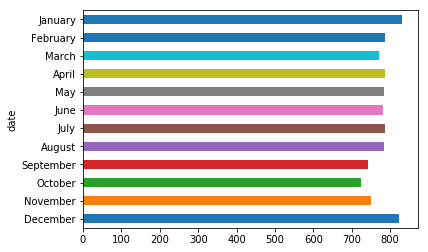

In [95]:
calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean().reindex(index = ['December','November','October','September','August','July','June','May','April','March','February','January']).plot(kind = 'barh')

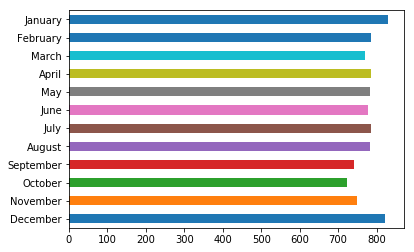

In [96]:
ax = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['adjusted_price'].mean().reindex(index = ['December','November','October','September','August','July','June','May','April','March','February','January']).plot(kind = 'barh')
ax.get_yaxis().get_label().set_visible(False)

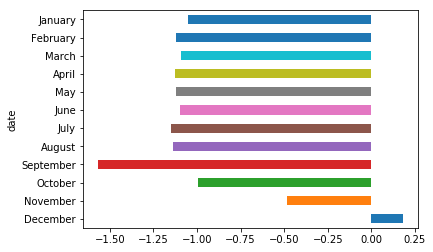

In [97]:
calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['delta_price'].mean().reindex(index = ['December','November','October','September','August','July','June','May','April','March','February','January']).plot(kind = 'barh')


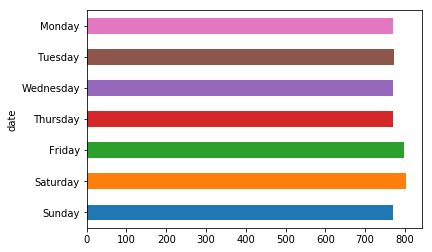

In [98]:
calendar.groupby(calendar['date'].dt.strftime('%A'),sort=False)['price'].mean().reindex(index=['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']).plot(kind = 'barh')


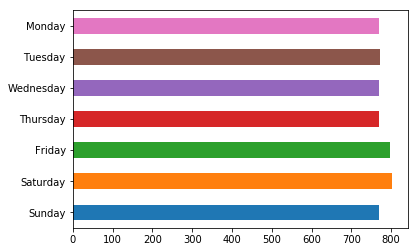

In [99]:
ax = calendar.groupby(calendar['date'].dt.strftime('%A'),sort=False)['adjusted_price'].mean().reindex(index=['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']).plot(kind = 'barh')
ax.get_yaxis().get_label().set_visible(False)

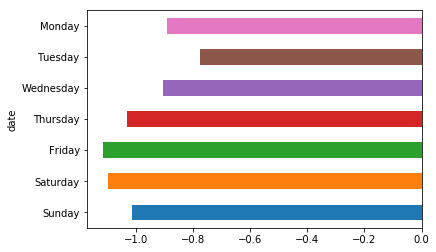

In [100]:
calendar.groupby(calendar['date'].dt.strftime('%A'),sort=False)['delta_price'].mean().reindex(index=['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']).plot(kind = 'barh')


In [101]:
listing = pd.read_csv('listings.csv')
listing['price'] = pd.to_numeric(listing['price'].str.replace('$','').str.replace(',',''));
listing = listing.drop(['id','listing_url','scrape_id','last_scraped','host_id','country','country_code','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','calendar_last_scraped'],axis=1)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


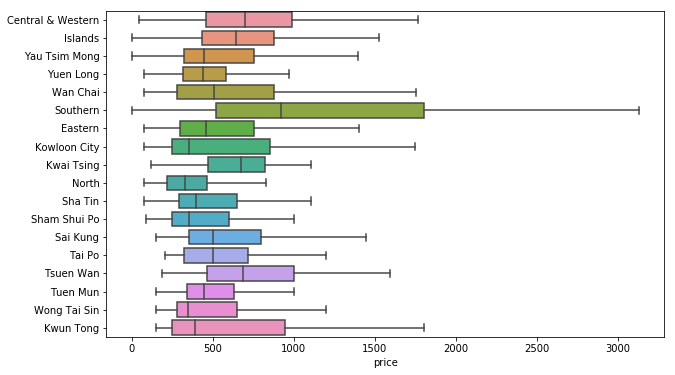

In [102]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=listing, orient="h", x='price',y='neighbourhood_cleansed',showfliers=False)
ax.get_yaxis().get_label().set_visible(False)

In [103]:
list(listing.columns)

['name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fe

In [104]:
dropping = []
for colName in listing.columns:
    if(listing[colName].isnull().mean() > 0.5):
        dropping.append(colName)
        print("Dropping column '" + colName + "' with %" + str( round(listing[colName].isnull().mean()*100,2) ) + " missing data")
        
listing = listing.drop(dropping,axis=1)

Dropping column 'notes' with %57.28 missing data
Dropping column 'access' with %56.76 missing data
Dropping column 'interaction' with %52.7 missing data
Dropping column 'house_rules' with %52.51 missing data
Dropping column 'thumbnail_url' with %100.0 missing data
Dropping column 'medium_url' with %100.0 missing data
Dropping column 'xl_picture_url' with %100.0 missing data
Dropping column 'host_acceptance_rate' with %100.0 missing data
Dropping column 'neighbourhood_group_cleansed' with %100.0 missing data
Dropping column 'zipcode' with %93.04 missing data
Dropping column 'square_feet' with %99.56 missing data
Dropping column 'weekly_price' with %94.41 missing data
Dropping column 'monthly_price' with %93.83 missing data
Dropping column 'license' with %99.9 missing data
Dropping column 'jurisdiction_names' with %100.0 missing data


In [105]:
object = list(listing.columns[listing.dtypes == 'object'])
nonobject = list(listing.columns[listing.dtypes != 'object'])

In [106]:
listing[nonobject].nunique()

host_listings_count              59
host_total_listings_count        59
latitude                       5869
longitude                      5882
accommodates                     16
bathrooms                        17
bedrooms                         12
beds                             19
price                           370
guests_included                  15
minimum_nights                   54
maximum_nights                  144
minimum_minimum_nights           52
maximum_minimum_nights           57
minimum_maximum_nights          144
maximum_maximum_nights          144
minimum_nights_avg_ntm          147
maximum_nights_avg_ntm          172
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                364
number_of_reviews               295
number_of_reviews_ltm           118
review_scores_rating             46
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin       

In [107]:
listing.update(listing[nonobject].fillna(0))

In [108]:
distinct_values = listing[object].nunique()
listing = listing.drop(distinct_values[(distinct_values == 1)|(distinct_values>30)].keys(),axis=1)
distinct_values[(distinct_values != 1)&(distinct_values<30)]

host_response_time                   4
host_is_superhost                    2
host_has_profile_pic                 2
host_identity_verified               2
neighbourhood_cleansed              18
market                              12
is_location_exact                    2
room_type                            4
bed_type                             5
instant_bookable                     2
cancellation_policy                  6
require_guest_profile_picture        2
require_guest_phone_verification     2
dtype: int64

In [109]:
listing['market'].value_counts()

Hong Kong                 11405
Kowloon Peninsula           572
Hong Kong Island North      398
New Territories (HK)        148
Hong Kong Island South       49
Islands (HK)                 20
Lantau                       20
Shenzhen                      1
Other (International)         1
Bangkok                       1
Cologne                       1
Other (Domestic)              1
Name: market, dtype: int64

In [110]:
temp = listing['market'].value_counts()
for colName in temp[temp<25].keys():
    listing['market'] = listing['market'].replace(colName,'Other');

In [111]:
for colName in (distinct_values[distinct_values ==2].keys()):
    print(colName + " contains "+ str(listing[colName].unique()))

host_is_superhost contains ['f' 't' nan]
host_has_profile_pic contains ['t' 'f' nan]
host_identity_verified contains ['t' 'f' nan]
is_location_exact contains ['t' 'f']
instant_bookable contains ['f' 't']
require_guest_profile_picture contains ['f' 't']
require_guest_phone_verification contains ['f' 't']


In [112]:
listing.host_is_superhost = listing.host_is_superhost.replace('t',True).replace('f',False).fillna(False)
listing.host_has_profile_pic = listing.host_has_profile_pic.replace('t',True).replace('f',False).fillna(False)
listing.host_identity_verified = listing.host_identity_verified.replace('t',True).replace('f',False).fillna(False)
listing.is_location_exact = listing.is_location_exact.replace('t',True).replace('f',False)
listing.instant_bookable = listing.instant_bookable.replace('t',True).replace('f',False)
listing.require_guest_profile_picture = listing.require_guest_profile_picture.replace('t',True).replace('f',False)
listing.require_guest_phone_verification = listing.require_guest_phone_verification.replace('t',True).replace('f',False)

In [113]:
def create_dummy_df(df, cat_cols):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=df[col].isnull().mean()>0)], axis=1)
        except:
            continue
    return df
listing = create_dummy_df(listing,list(listing.columns[listing.dtypes == 'object']))

In [114]:
X = listing.drop(['price'], axis=1)
y = listing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
X.columns

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'is_location_exact', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'host_response_time_within a day',
       'host_response

In [115]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.017396652386775013
4737049.1194366375
131.90599999999995


In [121]:
coeff_dataframe = pd.DataFrame()

coeff_dataframe['est_int'] = X_train.columns
coeff_dataframe['coeff'] = ForestRegressor.feature_importances_
coeff_dataframe.sort_values('coeff', ascending=False).head(10)

,est_int,coeff
5,latitude,0.241714
6,longitude,0.123632
10,bedrooms,0.044397
37,reviews_per_month,0.037585
24,availability_365,0.036370
11,beds,0.033461
9,bathrooms,0.032828
8,accommodates,0.031196
25,number_of_reviews,0.025132
26,number_of_reviews_ltm,0.025060
